# Load data

In [1]:
from sklearn import tree
import sklearn as sk
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#การอ่านข้อมูลที่เป็น csv โดยที่ column แรกไม่ต้องใส่ index
data = pd.read_csv('project2_heart.csv', index_col = 0)
print(data)

     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
1     63    1       typical     145   233    1        2    150      0   
2     67    1  asymptomatic     160   286    0        2    108      1   
3     67    1  asymptomatic     120   229    0        2    129      1   
4     37    1    nonanginal     130   250    0        0    187      0   
5     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
299   45    1       typical     110   264    0        0    132      0   
300   68    1  asymptomatic     144   193    1        0    141      0   
301   57    1  asymptomatic     130   131    0        0    115      1   
302   57    0    nontypical     130   236    0        2    174      0   
303   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
1        2.3      3  0.0       fixed   No  
2        1.5      2  3.0      norma

# Data Summarization and Exploration

In [3]:
#บอกจำนวน instant และ feature จากผลลัพธ์จะเห็นว่าทั้งหมดมี instant ทั้งหมด 303 ตัว และมี feature 14 ตัว
data.shape

(303, 14)

In [4]:
#ดูข้อมูลสถิติเบื้องต้น โดยผลลัพธ์ที่ได้จะประกอบไปด้วย จำนวน ค่าเฉลี่ย ส่วนเบี่ยงเบนมาตรฐาน ค่าต่ำสุด ค่าเปอร์เซ็นที่ 25 50 75 และค่าสูงสุดของแต่ละ feature
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [5]:
#เพื่อดูข้อมูลเบื้องต้น ทำให้ทราบว่าข้อมูลมี instant 303 ตัว มี feature 14 ตัว มีข้อมูลที่เป็น float 2 ตัว int 9 ตัว และ object 3 ตัว 
#และสามารถดูได้ว่า feature ใดบ้างที่มี missing จากข้อมูลพบว่า feature 'Ca' มี missing 4 instant และ feature 'Thal' มี missing 2 instant
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [6]:
#การเรียกดูข้อมูล 5 ตัวแรก
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


# Cleaning data by missing

In [7]:
#เพื่อดูว่า feature ใดบ้างที่มี missing จากผลลัพธ์จะเห็นว่า Ca Thal มีจำนวนค่าว่างเป็น 4 และ 2 ตามลำดับ
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [8]:
#ให้ใส่ mean ในช่องที่มี missing 
## Ca
data.Ca.fillna((data['Ca']).mode()[0]  , inplace=True)

In [9]:
#ให้ใส่ mode ในช่องที่มี missing 
## Thal
data.Thal.fillna((data['Thal']).mode()[0] , inplace=True)

In [10]:
#ใช้คำสั่ง isnull() อีกครั้งเพื่อดูว่ายังมี feature ใดบ้างที่มี missing อยู่ จากผลลัพธ์จะเห็นว่าทุก feature ไม่มี missing
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

# Cleaning data by nunique

In [11]:
#ให้ลบรายการที่ซ้ำออก เนื่องจากไม่มีค่าซ้ำจึงได้ instant 303 ตัว feature 14 ตัว 
data.drop_duplicates(inplace=True)
print(data.shape)

(303, 14)


In [12]:
#ดูว่าแต่ละ feature มี instant ที่ไม่มีแตกต่างกี่ค่า จากผลลัพธ์จะเห็นว่า feature 'ChestPain','RestECG', 'Slope', 'Ca','Thal', 'AHD'
#มีจำนวน instant ที่ไม่มีแตกต่างกัน 4 3 3 5 4 ตามลำดับ 
data.nunique()

Age           41
Sex            2
ChestPain      4
RestBP        50
Chol         152
Fbs            2
RestECG        3
MaxHR         91
ExAng          2
Oldpeak       40
Slope          3
Ca             4
Thal           3
AHD            2
dtype: int64

# Cleaning data by dummy

In [13]:
#สร้างตัวแปร dummy 
hot = pd.get_dummies(data['ChestPain'], dtype = float)
hot1 = pd.get_dummies(data['RestECG'], dtype = float)
hot2 = pd.get_dummies(data['Slope'], dtype = float)
hot3 = pd.get_dummies(data['Ca'], dtype = float)
hot4 = pd.get_dummies(data['Thal'], dtype = float)

In [14]:
# สร้าง new โดยเปลี่ยนชื่อ feature 'AHD' เป็น 'AHD_Yes' และแทนที่ข้อความ 'Yes' ด้วย '1' แทนที่ 'No' ด้วย '0' 
new = data.rename(columns={"AHD": "AHD_Yes"})
new1 = (new['AHD_Yes']).replace(['Yes','No'],['1','0'])
new1

1      0
2      1
3      1
4      0
5      0
      ..
299    1
300    1
301    1
302    1
303    0
Name: AHD_Yes, Length: 303, dtype: object

In [15]:
# สร้าง df1 โดยเก็บข้อมูล new_df, hot, hot1, hot2, hot3, hot4, AHD_Yes
df1 = pd.concat([data, hot, hot1, hot2, hot3, hot4, new1], axis = 1)
df1
# สร้าง df โดยลบ feature 'ChestPain','RestECG', 'Slope', 'Ca','Thal', 'AHD' ใน df1 ออก
df = df1.drop(['ChestPain','RestECG', 'Slope', 'Ca','Thal', 'AHD'], axis = 1)
df.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,asymptomatic,nonanginal,...,2,3,0.0,1.0,2.0,3.0,fixed,normal,reversable,AHD_Yes
1,63,1,145,233,1,150,0,2.3,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,67,1,160,286,0,108,1,1.5,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,67,1,120,229,0,129,1,2.6,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,37,1,130,250,0,187,0,3.5,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5,41,0,130,204,0,172,0,1.4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [16]:
#นับจำนวนค่าที่ unique ใน feature 'AHD_Yes' และเก็บไว้ใน n_class ผลลัพธืที่ได้คือ n_class = 2
n_class = len(np.unique(df['AHD_Yes'])) ; print(n_class)

2


In [17]:
#ดูว่าค่าที่ unique ใน feature 'AHD_Yes' มีค่าใดบ้าง จากผลลัพธ์จะมี 2 ค่า คือ '0' และ '1' โดยเป็นข้อมูลระเภท object
np.unique(df['AHD_Yes'])

array(['0', '1'], dtype=object)

In [18]:
# Setting input features x and target output y
X = np.array(df.iloc[:,:-1]); print(X.shape) #กำหนดให้ X เก็บทุก instant ยกเว้น feature สุดท้าย
y = np.array(df['AHD_Yes']); print(y.shape) #กำหนดให้ y เก็บทุก instant ใน feature 'AHD_Yes'
print(X.shape)
print(np.unique(y))
n_class = len(np.unique(y)); print(n_class)

(303, 25)
(303,)
(303, 25)
['0' '1']
2


In [19]:
# Fit Model ด้วย Decision tree โดยใช้เงื่อนไขของ gini
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, y)

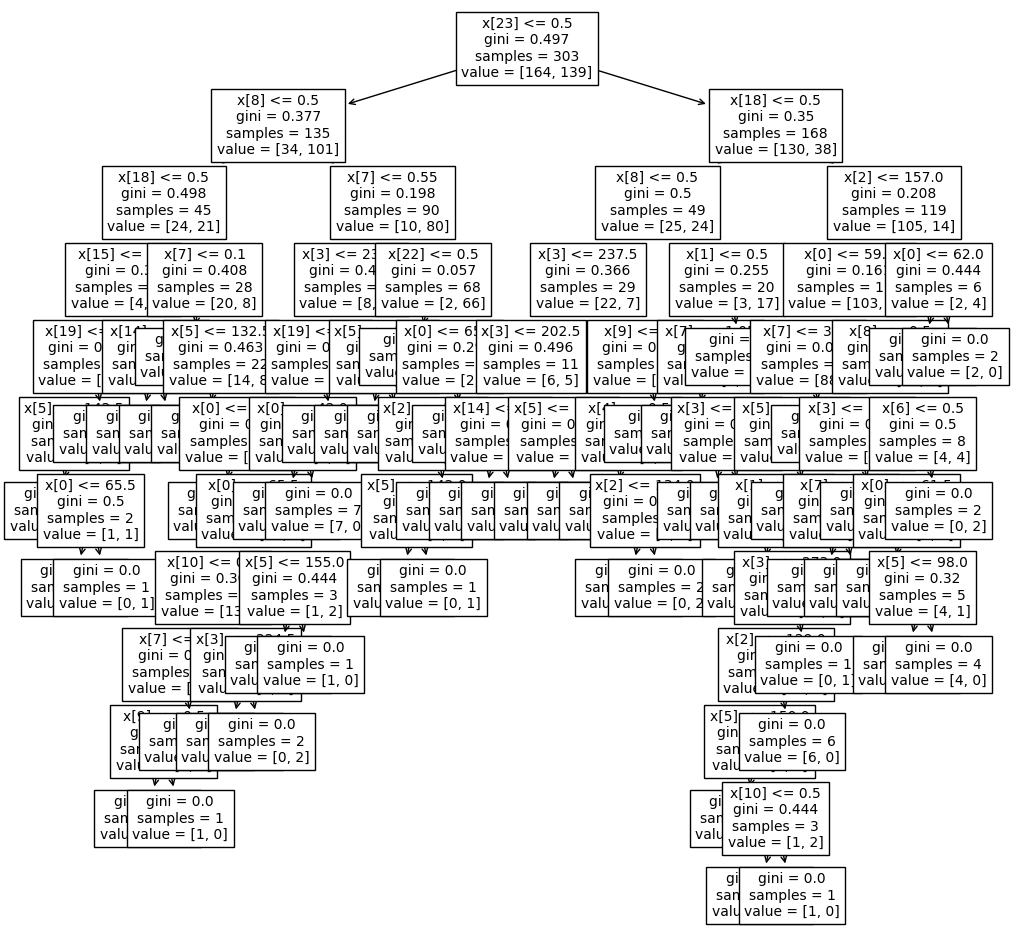

In [20]:
# plot tree จากภาพจะเห็นว่ามี 10 ชั้น
plt.figure(figsize=(12,12)) # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show() 

In [21]:
# Descriptive tree
from sklearn.tree import export_text
r = export_text(clf)
print(r)

|--- feature_23 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_18 <= 0.50
|   |   |   |--- feature_15 <= 0.50
|   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |--- feature_5 <= 142.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  142.50
|   |   |   |   |   |   |--- feature_0 <= 65.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  65.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_19 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  0.50
|   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_18 >  0.50
|   |   |   |--- feature_7 <= 0.10
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  0.10
|   |   |   |   |--- feature_5 <= 132.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  132.50
|   |   |   |   |   |--- fe

In [22]:
# Splitting data โดยแบ่งเป็น train 70% และ test 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,
random_state = 10)

In [23]:
#  Fit model
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
clf.predict(X_test) # Making prediction
clf.predict_proba(X_test) # Checking predicted probability output

D:\New folder\envs\main\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.35205427, 0.64794573],
       [0.10417284, 0.89582716],
       [0.32792565, 0.67207435],
       [0.00647967, 0.99352033],
       [0.90310509, 0.09689491],
       [0.01978746, 0.98021254],
       [0.36525592, 0.63474408],
       [0.8670489 , 0.1329511 ],
       [0.96360271, 0.03639729],
       [0.00738538, 0.99261462],
       [0.94740724, 0.05259276],
       [0.03432737, 0.96567263],
       [0.02301699, 0.97698301],
       [0.86420847, 0.13579153],
       [0.85055919, 0.14944081],
       [0.1462824 , 0.8537176 ],
       [0.07210623, 0.92789377],
       [0.98058458, 0.01941542],
       [0.00693768, 0.99306232],
       [0.94664782, 0.05335218],
       [0.74973791, 0.25026209],
       [0.99239936, 0.00760064],
       [0.62013777, 0.37986223],
       [0.02893852, 0.97106148],
       [0.66127613, 0.33872387],
       [0.95811453, 0.04188547],
       [0.04445835, 0.95554165],
       [0.87595725, 0.12404275],
       [0.01306759, 0.98693241],
       [0.00293111, 0.99706889],
       [0.

In [24]:
# Evaluation
tr_acc =clf.score(X_train, Y_train); print('training accuracy: ', tr_acc)
te_acc = clf.score(X_test, Y_test); print('testing accuracy: ', te_acc)

training accuracy:  0.8773584905660378
testing accuracy:  0.8791208791208791
